# Ridge, Lasso and Elasticnet

Ora che abbiamo capito come effettuare la regressione lineare anche con più di una variabile indipendente(MLR), è ora necessario vedere come applicare altri metodi lineari per ovviare ai problemi che possono influire sulle previsioni o sul training, ed essi sono:

- collinearità: ovvero la possibilità di due o più feature di presentare una relazione di tipo lineare consistente nel dataset, questo in genere è un bene solo nel caso in cui sia perfetta, altrimenti può portare all'insordenza di problemi
- dimensionalità: in alcuni casi potremmo avere un numero di feature molto grandi o addirittura maggiori del numero di samples al suo interno
- overfitting  o underfitting: il modello non riesce ad estrapolare relazioni generali a causa della sua complessità maggiore o minore al problema.

Per questo motivo, basandoci sempre sulla tecnica **OLS** sono state creati altre tecniche più robuste per la regressione, in genere queste tecniche che andremo ad analizzare si basano sulla __[Regolarizzazione](https://it.wikipedia.org/wiki/Regolarizzazione_(matematica))__ ovvero sull'**imposizione sulla formula di minimizzazione di un termine che penalizzi una specifica condizione legata al problema al fine di ridurne l'errore di generalizzazione**.<br>
La regoralizzazione viene imposta attraverso le __[condizioni di Karush-Kuhn-Tucker(KKT)](http://onmyphd.com/?p=kkt.karush.kuhn.tucker)__ dove quindi introduciamo dei termini di penalizzazione sugli unici termini che possiamo controllare: **i pesi($w$)**. In questa lezione vedremo che la condizione sui pesi come **la norma, la norma quadratica di $w$ o la loro condizione ibrida** porta a diversi tipi di regressori esprimibili matematicamente come:
- Ridge Regression : $\large\min_{w} \parallel wX - Y \parallel^2 + \alpha \parallel w \parallel^2$
- Lasso Regression : $\large\min_{w} \parallel wX - Y \parallel^2 + \beta \parallel w \parallel$
- Elasticnet : $\large\min_{w} \parallel wX - Y \parallel^2 + \alpha \parallel w \parallel^2 + \beta \parallel w \parallel$

I parametri $\alpha$ e $\beta$ sono detti anche **Iperparametri-Hyperparameters** e vengono determinati usando **criteri di statistica o la cross-validation scegliendo tra quelli che minimizzano l'errore di testing**.

## Ridge Regression

Iniziamo ad analizzare la __[Ridge regression](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)__ riportando la formula definita in precedenza, in cui il termine modulo quadro della norma viene anche detto ***termine $l_{2}$***

\begin{equation}
\Large\min_{w} \parallel wX - Y \parallel^2 + \alpha \parallel w \parallel^2 
\end{equation}

la trattazione può essere vista anche in questo modo 

\begin{equation}
\Large\min_{w} \parallel wX - Y \parallel^2 , \parallel w \parallel^2 \leq \alpha
\end{equation}

ovvero la condizione risulta che i pesi che devono soddisfare la **OLS** devono avere un modulo quadro **minore di $\alpha$** per poter essere ammesi dalla formula, ma qualè l'effetto prodotto dalla $\alpha$ sui fit?

In [1]:
%matplotlib widget

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from ipywidgets import widgets, interactive_output

#load the dataset
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['MEDV'] = data.target
#prepare the data
X_train, X_test, y_train, y_test = train_test_split(df.LSTAT.values, df.MEDV.values, 
                                                    random_state=0, test_size = 0.2)
#define a first regressor
ridge = Ridge(alpha = 1)
ridge.fit(X_train.reshape(-1, 1), y_train)

#setting plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_train, y_train, label = "train", color = "blue")
ax.scatter(X_test, y_test, label = "test", color = "green")
line, = ax.plot(X_train, ridge.predict(X_train.reshape(-1, 1)), label = "fit", color = "red")
plt.legend()

#define what happens when slider value change
def update(alpha):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train.reshape(-1, 1), y_train)
    line.set_ydata(ridge.predict(X_train.reshape(-1, 1)))
    fig.canvas.draw()
    
#define slider
alpha = widgets.FloatSlider(
        value=1,
        min = 0, # min value 
        max= 1e5, # max value
        step= 1, # step 
        description = "\u03B1") # unicode character for alpha

# An HBox lays out its children horizontally
ui = widgets.HBox([alpha])
#define interactive output
plot = interactive_output(update, {'alpha':alpha})
#show slider and plot
display(plot,ui)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Output()

Quindi possiamo vedere che alzando il valore di $\alpha$ quello che succede è che i pesi tendono a zero e la linea diventa orizzontaele questo poichè il termine dominante della funzione di regressione diventa il termine di regolarizzazione, in tal caso l'unico modo per ridure complessivamente il valore è fare tendere a zero $\parallel w \parallel^2$ ovvero ponendo i termini $w$ nulli o molto vicini ad esso. <br>
Questo aspetto può risultare molto efficacie nei problemi in cui il dataset presenta **multicollinearità, ovvero i dati presentano correlazioni tra di loro** e noi vogliamo invece tenere conto di feature quanto più possibili indipendenti e per la **riduzione delle dimensionalità**.

### Visione geometrica e riduzione della dimensionalità

La visione geometrica può essete interpretata partendo dalla formula che otteniamo per la pendenza dei coefficienti ottenibile come:

\begin{equation}
    \Large y = X \hat{\beta}^{ridge} = X (X^{T}X + \alpha I)^{-1}X^{T}y = \sum_{i=1}^{p} u_j \frac{d_{j}^{2}}{d_{j}^{2} + \alpha} u_{j}^Ty
\end{equation}

Ora focalizzandoci sulla formula possiamo notare che se noi consideriamo il caso in cui i dati sono centrati possiamo definire

\begin{equation}
    \large Var(\hat(B)_j) = \frac{u_{j}^{T}u_j}{d_{j}^2} \qquad \hat{\beta}^{ridge} = \sum_{i=1}^{p} \frac{d_{j}^{2}}{d_{j}^{2} + \alpha} u_{j}^T y
\end{equation} 

pertanto il termine $\alpha$ riduce la proiezione delle direzioni $u_{j}$ che presentano una varianza più bassa, questo vuol dire che più è alto il valore di $\alpha$ e avremo componenti con varianza sempre più alta. questo principio a simile a quello che vedremo essere come PCA.

<div class="alert alert-block alert-success">
    La cosa forse più interessante dela Ridge Regression è la sua capacità di fittare su dati con molte dimensionalità avendo un piccolo numero di dati riuscendo a cogliere gli aspetti fondamentali della struttura dei dati! Per maggiori infor guardate il video qui sotto!
</div>

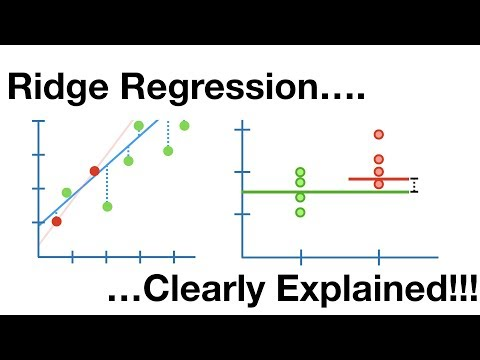

In [2]:
from IPython.display import YouTubeVideo

#put link yotube video, only final part
YouTubeVideo('Q81RR3yKn30')

In [3]:
%matplotlib widget
#prepare the data
X_train, X_test, y_train, y_test = train_test_split(df.drop('MEDV', axis = 1).values, df.MEDV.values, 
                                                    random_state=0, test_size = 0.2)

#define a first regressor
ridge = Ridge(alpha = 1000)
ridge.fit(X_train, y_train)

#variables used for plots
names = df.columns.tolist()[:-1]#exclude last element
variance = df.drop('MEDV', axis = 1).var(axis = 0)
ypos = range(len(names))

#show data model as dataframe
#define dataframe
df_model = pd.DataFrame(columns=names)
df_model.loc['weights'] = ridge.coef_.tolist()
df_model.loc['variance'] = variance.tolist()
#display dataframe
display("Variance and weights with \u03B1 = 1000")
display(df_model)
#model with alpha =1
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)
df_model.loc['weights'] = ridge.coef_.tolist()
#display dataframe
display("Variance and weights with \u03B1 = 1")
display(df_model)


#plot setting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,6))
#first subplot
bar = ax1.barh(ypos, ridge.coef_, align = 'center', color = 'red')
ax1.set_yticks(ypos)
ax1.set_yticklabels(names)
ax1.set_xlabel('Weight value')
ax1.set_title('Weights of every feature')
#second subplot
ax2.barh(ypos, variance, align = 'center', color = 'green')
ax2.set_yticks(ypos)
ax2.set_yticklabels(names)
ax2.set_xlabel('Variance value')
ax2.set_title('Variance of every feture')
plt.show()

#define what happens when slider value change
def update(alpha):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    for i in range(len(ridge.coef_)):
        bar[i].set_width(ridge.coef_[i])
    df_model.loc['weights'] = ridge.coef_.tolist()
    fig.canvas.draw()


#define slider
alpha = widgets.FloatSlider(
        value=1,
        min = 1, # min value 
        max= 1000, # max value
        step= 1, # step 
        description = "\u03B1") # unicode character fro alpha
# An HBox lays out its children horizontally
ui = widgets.HBox([alpha])
#define interactive output
plot = interactive_output(update, {'alpha':alpha})
#show slider and plot
display(plot,ui)

'Variance and weights with α = 1000'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
weights,-0.087876,0.059909,-0.044061,0.084989,-0.008172,0.454157,0.028739,-0.546187,0.233914,-0.015136,-0.685913,0.006599,-0.718846
variance,73.986578,543.936814,47.064442,0.064513,0.013428,0.493671,792.358399,4.434015,75.816366,28404.759488,4.686989,8334.752263,50.994760


'Variance and weights with α = 1'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
weights,-0.116808,0.046003,-0.023762,2.278150,-8.557796,3.755135,-0.010414,-1.280095,0.222038,-0.011526,-0.969288,0.008535,-0.498849
variance,73.986578,543.936814,47.064442,0.064513,0.013428,0.493671,792.358399,4.434015,75.816366,28404.759488,4.686989,8334.752263,50.994760


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Output()

## Lasso Regression

Ora che abbiamo capito come funziona la ridge regression, vediamo ora come funziona la **Lasso Regression**, partiamo dalla sua formula matematica che a differenza precedente predente un termine di norma detto anche ***termine $l_1$***

\begin{equation}
\Large\min_{w} \parallel wX - Y \parallel^2 + \beta \parallel w \parallel 
\end{equation}

la trattazione può essere vista anche in questo modo 

\begin{equation}
\Large\min_{w} \parallel wX - Y \parallel^2 , \parallel w \parallel \leq \beta
\end{equation}

Vediamo cosa succede qualora usiamo questo regressore variando il parametro $\beta$.

In [4]:
%matplotlib widget
#import the model
from sklearn.linear_model import Lasso
#prepare the data
X_train, X_test, y_train, y_test = train_test_split(df.LSTAT.values, df.MEDV.values, 
                                                    random_state=0, test_size = 0.2)
#define a first regressor
lasso = Lasso(alpha = 1)
lasso.fit(X_train.reshape(-1, 1), y_train)

#setting plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_train, y_train, label = "train", color = "blue")
ax.scatter(X_test, y_test, label = "test", color = "green")
line, = ax.plot(X_train, lasso.predict(X_train.reshape(-1, 1)), label = "fit", color = "red")
plt.legend()

#define what happens when slider value change
def update(alpha):
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train.reshape(-1, 1), y_train)
    line.set_ydata(lasso.predict(X_train.reshape(-1, 1)))
    fig.canvas.draw()
    
#define slider
alpha = widgets.FloatSlider(
        value=1,
        min = 1, # min value 
        max= 100, # max value
        step= 1, # step 
        description = "\u03B2") # unicode character fro alpha
# An HBox lays out its children horizontally
ui = widgets.HBox([alpha])
#define interactive output
plot = interactive_output(update, {'alpha':alpha})
#show slider and plot
display(plot,ui)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Output()

Come possiamo vedere in questo caso il valore di $\beta$(nel codice è sempre alpha) porta a **delle soluzioni dei coefficienti che tendono a zero per valori $\beta$ molto più piccoli rispetto alla ridge**, il motivo è da ricerca il fatto che ***la penalizzazione ora è l1***.

### Visione geometrica- Lasso Regression
La lasso regression non può essere riespressa come prima a causa del fatto che ora **non si ha una soluzione analitica a causa della non linearità in Y nella definizione**, questo può portare a dei problemi, fortunamente è ancora possibile visualizzare geometricamente il problema con il video qui sotto, rimane pur sempre la questione di capire cosa succede, la risposta risulta essere che il lasso tenda a fornire ***sparse solution, ovvero soluzione con un basso numero di soluzioni diverse da zero.***<br>
Questo aspetto è fondamentale poiché grazie ad esso possiamo dire anche che ***il lasso tende a selezionare le feature più importanti e che riducono la varianza del modello sui dati al prezzo di un minimo di bais; per questo motivo la lasso viene anche usata come feature selction algorithm.***

<div class="alert alert-block alert-warning">
L'algoritmo usato da scikit è quello del <a href="https://en.wikipedia.org/wiki/Coordinate_descent">coordinate descent</a>, non dello SGD e questo tipo di algoritmo richiede funzioni convesse.
</div>


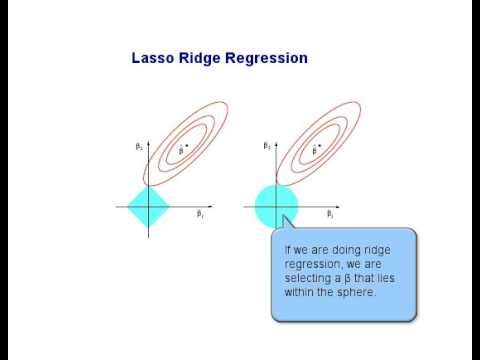

In [5]:
#put link yotube video, only final part
YouTubeVideo('14MKVkhvMus')

In [6]:
#prepare the data
X_train, X_test, y_train, y_test = train_test_split(df.drop('MEDV', axis = 1).values, df.MEDV.values, 
                                                    random_state=0, test_size = 0.2)

#define a first regressor
lasso = Lasso(alpha = 100)
lasso.fit(X_train, y_train)


#display dataframe
df_model.loc['weights'] = lasso.coef_.tolist()
display("Variance and weights with \u03B2 = 100")
display(df_model)

#model with alpha =1
lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)
df_model.loc['weights'] = lasso.coef_.tolist()
#display dataframe
display("Variance and weights with \u03B2 = 1")
display(df_model)

#plot setting
fig, ax = plt.subplots(figsize = (10,6))
#first subplot
bar = ax.barh(ypos, lasso.coef_, align = 'center', color = 'red')
ax.set_yticks(ypos)
ax.set_yticklabels(names)
ax.set_xlabel('Weight value')
ax.set_title('Weights of every feature')

#define what happens when slider value change
def update(alpha):
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    for i in range(len(lasso.coef_)):
        bar[i].set_width(lasso.coef_[i])
    df_model.loc['weights'] = lasso.coef_.tolist()
    fig.canvas.draw()


#define slider
alpha = widgets.FloatSlider(
        value=1,
        min = 1, # min value 
        max= 100, # max value
        step= 1, # step 
        description = "\u03B2") # unicode character fro alpha
# An HBox lays out its children horizontally
ui = widgets.HBox([alpha])
#define interactive output
plot = interactive_output(update, {'alpha':alpha})
#show slider and plot
display(plot,ui)

'Variance and weights with β = 100'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
weights,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.023137,-0.000000,0.004687,-0.00000
variance,73.986578,543.936814,47.064442,0.064513,0.013428,0.493671,792.358399,4.434015,75.816366,28404.759488,4.686989,8334.752263,50.99476


'Variance and weights with β = 1'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
weights,-0.058890,0.053177,-0.000000,0.000000,-0.000000,0.679550,0.016841,-0.648766,0.198738,-0.013994,-0.864220,0.006603,-0.73121
variance,73.986578,543.936814,47.064442,0.064513,0.013428,0.493671,792.358399,4.434015,75.816366,28404.759488,4.686989,8334.752263,50.99476


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Output()

## ElasticNet

Ora che abbiamo visto come funzionano la Lasso e la Ridge regression, vediamo la __[ElasticNet Regression](https://core.ac.uk/reader/4406480)__ che è un intermezzo tra le due regressioni precedenti e assume la formula:

\begin{equation}
\Large \min_{w} \parallel wX - Y \parallel^2 + \alpha \parallel w \parallel^2 + \beta \parallel w \parallel
\end{equation}

dove quindi abbiamo un **termine di regolarizzazione sia su il modulo quadro di $w^2$ che il modulo $w$**.<br>
La formula di scikit per l'elasticnet è leggermente diversa ed è del tipo:

\begin{equation}
\large \min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}
\end{equation}

in questa formula il termine $\rho$ deve essere un numero compreso tra 0 e 1 e ci dice in che misura contare i termini L1 e L2, metre $\alpha$ è il solito termoine di penalizzazione.

<div class="alert alert-block alert-success">
    Nel 2014 è stato scoperto che Elasticnet è come una Support Vector Machine lineare, vedremo in seguito cosa sono!
</div>

In [7]:
from sklearn.linear_model import ElasticNet
#prepare the data
X_train, X_test, y_train, y_test = train_test_split(df.LSTAT.values, df.MEDV.values, 
                                                    random_state=0, test_size = 0.2)
#define a first regressor
elastic = ElasticNet(alpha = 1, l1_ratio = 0.5)
elastic.fit(X_train.reshape(-1, 1), y_train)

#setting plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_train, y_train, label = "train", color = "blue")
ax.scatter(X_test, y_test, label = "test", color = "green")
line, = ax.plot(X_train, elastic.predict(X_train.reshape(-1, 1)), label = "fit", color = "red")
plt.legend()

alpha =  widgets.FloatSlider(value=1, min = 1, max= 1e3, step= 1, description = "\u03B1")
rho =  widgets.FloatSlider(value=0.5, min = 0.01, max= 1, step= 0.01, description = "\u03C1")

#define what happens when slider value change
def update(alpha, rho):
    elastic = ElasticNet(alpha = alpha, l1_ratio = rho)
    elastic.fit(X_train.reshape(-1, 1), y_train)
    line.set_ydata(elastic.predict(X_train.reshape(-1, 1)))
    fig.canvas.draw()
    
# An HBox lays out its children horizontally
ui = widgets.HBox([alpha, rho])
#define interactive output
plot = interactive_output(update, {'alpha':alpha, 'rho':rho})
#show slider and plot
display(plot,ui)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Output()

### Interpretazione geometrica dell'elasticnet

L'elasticnet può essere visto come un'intermezzo tra la ridge e il lasso, dal punto di vista geometrico potete interpretarlo con questa immagine:

![Elasticnet geometrical view](../img/elasticnet.png)

il parametro $\rho$ nella formula ci dice come vogliamo sia la formula di penalizzazione, con il parametro uguale a 1 abbiamo un lasso, mentre con zero abbiamo un comportamento ridge, con 0.5 abbiamo un comportamento intermedio tra i due.

In [8]:
#prepare the data
X_train, X_test, y_train, y_test = train_test_split(df.drop('MEDV', axis = 1).values, df.MEDV.values, 
                                                    random_state=0, test_size = 0.2)
#model with alpha =100
elastic = ElasticNet(alpha = 100, l1_ratio = 0.5)
elastic.fit(X_train, y_train)
df_model.loc['weights'] = elastic.coef_.tolist()

#display dataframe
display("Variance and weights with \u03B2 = 100, \u03C1 = 0.5")
display(df_model)

#define a first regressor
elastic = ElasticNet(alpha = 1, l1_ratio=0.5)
elastic.fit(X_train, y_train)

#display dataframe
df_model.loc['weights'] = elastic.coef_.tolist()
display("Variance and weights with \u03B1 = 1, \u03C1 = 0.5")
display(df_model)

#plot setting
fig, ax = plt.subplots(figsize = (10,6))
#first subplot
bar = ax.barh(ypos, elastic.coef_, align = 'center', color = 'red')
ax.set_yticks(ypos)
ax.set_yticklabels(names)
ax.set_xlabel('Weight value')
ax.set_title('Weights of every feature')

#define sliders
alpha =  widgets.FloatSlider(value=1, min = 1, max= 100, step= 1, description = "\u03B1")
rho =  widgets.FloatSlider(value=0.5, min = 0.01, max= 1, step= 0.01, description = "\u03C1")

#define what happens when slider value change
def update(alpha, rho):
    elastic = ElasticNet(alpha = alpha, l1_ratio = rho)
    elastic.fit(X_train, y_train)
    for i in range(len(elastic.coef_)):
        bar[i].set_width(elastic.coef_[i])
    df_model.loc['weights'] = elastic.coef_.tolist()
    fig.canvas.draw()


# An HBox lays out its children horizontally
ui = widgets.HBox([alpha, rho])
#define interactive output
plot = interactive_output(update, {'alpha':alpha, 'rho':rho})
#show slider and plot
display(plot,ui)

'Variance and weights with β = 100, ρ = 0.5'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
weights,-0.000000,0.007871,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.023099,-0.000000,0.010668,-0.00000
variance,73.986578,543.936814,47.064442,0.064513,0.013428,0.493671,792.358399,4.434015,75.816366,28404.759488,4.686989,8334.752263,50.99476


'Variance and weights with α = 1, ρ = 0.5'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
weights,-0.079223,0.056378,-0.024847,0.000000,-0.000000,0.842704,0.015518,-0.757884,0.228696,-0.014712,-0.856892,0.006905,-0.714712
variance,73.986578,543.936814,47.064442,0.064513,0.013428,0.493671,792.358399,4.434015,75.816366,28404.759488,4.686989,8334.752263,50.994760


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Output()

# Come trovare i parametri migliori? 

Per trovare i **parametri migliori dei modelli, detto anche hyperparameter tuning(poichè chiamati anche iperparametri)** consiste nel trovare dei metodi attraverso cui possiamo stabilire quali siano i valori di $\alpha$, $\beta$ o di qualsiasi altro parametro che il nostro modello usa per allenarsi sui dati, per questa trattazione vedremo tre modi : criterio di informazione di Akaike, criterio di informazione Baesiano e Cross validation.

## Akaike Information Criterion (AIC)

L'__[AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion)__ è un criterio che si basa sulla seguente formula:

\begin{equation}
    \Large AIC = 2k - 2\ln{(\hat{L})}
\end{equation}

dove $k$ indica il numero di parametri del modello, $\hat{L} = p(x | \theta, M)$ è il massimo valore di verosomiglianza del modello con x i dati, $\theta$ i parametri del modello e $M$ il modello stesso, dove il modello migliore è quello che minimizza l'AIC.

## Bayesian information criterion(BIC)

Il __[BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion)__ invece ha la seguente formula:

\begin{equation}
    \Large BIC = k\ln(n) - 2\ln{(\hat{L})}
\end{equation}

dove il parametro $n$ indica il numero di dati presenti.

## Cross Validation

Nel caso della __[Cross Validation](https://en.wikipedia.org/wiki/Cross-validation_%28statistics%29)__ queello che usiamo è la __[coordinate descent](https://en.wikipedia.org/wiki/Coordinate_descent)__ dove la formula su cui ci basiamo nel caso la funzione sia differenziabile può essere rappresentata come:

\begin{equation}
    \Large x_{i+1} = x_{i} - \alpha \frac{\partial F}{\partial x_{i}}(\textbf{x})
\end{equation}

in cui $\alpha$ rappresenta il passo da effettuare nello spazio, la F è la nostra funzione da minimizzare e possiamo decidere di fissarci su una singola componente o su un intero blocco di esse. Usiamo in tal caso la Cross Validation per essere sicuri che i parametri trovati siano effettivamente generali e non specifici al nostro dataset di training.

## Least Angle Regression (LARS)

La libreria scikit(__[link alla libreria](https://scikit-learn.org/stable/modules/linear_model.html#least-angle-regression)__) permette di usare un particolare algoritmo molto utile chiamato __[LARS](https://en.wikipedia.org/wiki/Least-angle_regression)__, che permette di allenare modelli anche ad alta dimensionalità e che permette di estrapolare le varibili maggiormente correlate al target ed i loro coefficienti, vedremo che con questo algoritmo è possibile applicare i modelli appena visti.

In [9]:
import time #libreria per tenere conto del tempo impiegato
from numpy import arange

#importiamo i metodi per trovare gli iperparametri
from sklearn.linear_model import RidgeCV, LassoCV, LassoLarsCV, LassoLarsIC, ElasticNetCV

#definiamo i dati da usare
X, Y = df.drop('MEDV', axis = 1).values, df.MEDV.values

print('Preparing the data for training and testing')
#prepare the data for the criterion optimization and testing 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size = 0.2)
print('Data prepared, the 80% will be used for training, and the remaining 20% will be for testing')
#separator
print('-'*80)

#range of alphas to try on ridge
alpha = range(0,100,1)
betas = arange(0.01, 1, 0.01)

#definiamo una Ridge cross validation con score r2 e 10 fold con il nostro insieme di parametri alpha
print('Ridge Model optimized using 10 folds croos validation and searching all integers alphas between 1 and 100')
ridge = RidgeCV(alphas = alpha, scoring = 'r2', cv = 10)
ridge_start = time.time()
ridge.fit(X_train, Y_train)
ridge_end = time.time()
print(f'Ridge best alpha: {ridge.alpha_}, R^2 score testing: {ridge.score(X_test, Y_test)}\n'
      f' time taken : {ridge_end - ridge_start}s')
#separator
print('-'*80)

#Lasso model using cv
print('Lasso Model optimized using 10 folds cross validation and searching all integers alphas between 1 and 100')
#even in this case you need to pass the number of parameters
lassocv = LassoCV(alphas = betas, cv = 10)
lassocv_start = time.time()
lassocv.fit(X_train, Y_train)
lassocv_end = time.time()
print(f'Lasso best alpha: {lassocv.alpha_}, R^2 score testing: {lassocv.score(X_test, Y_test)}, ' 
      f'numero iterazioni: {lassocv.n_iter_}\n time taken : {lassocv_end - lassocv_start}s')
#separator
print('-'*80)

#lasso using cv and lars
print('Lasso Model using Lars algorithm optimized using 10 folds cross validation and searching all integers alphas between 1 and 100')
#here i pass the maximum number of of alphas used on the path to compute the residual
lassolarscv = LassoLarsCV(max_n_alphas=100, cv = 10)
lassolarscv_start = time.time()
lassolarscv.fit(X_train, Y_train)
lassolarscv_end = time.time()
print(f'Lasso Lars best alpha: {lassolarscv.alpha_}, R^2 score testing: {lassolarscv.score(X_test, Y_test)}, '
      f'numero iterazioni: {lassolarscv.n_iter_}\n time taken : {lassolarscv_end - lassolarscv_start}s')
#separator
print('-'*80)

#lasso model using aic
print('Lasso Model using AIC criterion optimization')
#here i pass the maximum number of of alphas used on the path to compute the residual
lassolarsaic = LassoLarsIC(criterion='aic')
lassolarsaic_start = time.time()
lassolarsaic.fit(X_train,Y_train)
lassolarsaic_end = time.time()
print(f'Lasso Lars using AIC best alpha: {lassolarsaic.alpha_}, R^2 score testing: {lassolarsaic.score(X_test, Y_test)}, ' 
      f'numero iterazioni : {lassolarsaic.n_iter_}\n time taken : {lassolarsaic_end - lassolarsaic_start}s')
#separator
print('-'*80)


#lasso model using bic
print('Lasso Model using BIC criterion optimization')
#here i pass the maximum number of of alphas used on the path to compute the residual
lassolarsbic = LassoLarsIC(criterion='bic')
lassolarsbic_start = time.time()
lassolarsbic.fit(X_train,Y_train)
lassolarsbic_end = time.time()
print(f'Lasso Lars using BIC best alpha: {lassolarsbic.alpha_}, R^2 score testing: {lassolarsbic.score(X_test, Y_test)}, ' 
      f'numero iterazioni : {lassolarsbic.n_iter_}\n time taken : {lassolarsbic_end - lassolarsbic_start}s')
#separator
print('-'*80)

#Lasso model using cv
print('Elasticnet Model optimized using 10 folds cross validation and searching l1_ratio between 0 and 1')
#even in this case you need to pass the number of parameters
elasticv = ElasticNetCV(l1_ratio=betas, n_alphas=100, cv = 10)
elasticv_start = time.time()
elasticv.fit(X_train, Y_train)
elasticv_end = time.time()
print(f'Elasticnet best alpha: {elasticv.alpha_}, best l1_ratio: {elasticv.l1_ratio_}, R^2 score testing: {elasticv.score(X_test, Y_test)}, ' 
      f'numero iterazioni: {elasticv.n_iter_}\n time taken : {elasticv_end-  elasticv_start}s')
#separator
print('-'*80)

Preparing the data for training and testing
Data prepared, the 80% will be used for training, and the remaining 20% will be for testing
--------------------------------------------------------------------------------
Ridge Model optimized using 10 folds croos validation and searching all integers alphas between 1 and 100
Ridge best alpha: 0, R^2 score testing: 0.5892223849182503
 time taken : 2.002999782562256s
--------------------------------------------------------------------------------
Lasso Model optimized using 10 folds cross validation and searching all integers alphas between 1 and 100
Lasso best alpha: 0.01, R^2 score testing: 0.58499838480617, numero iterazioni: 64
 time taken : 0.16098308563232422s
--------------------------------------------------------------------------------
Lasso Model using Lars algorithm optimized using 10 folds cross validation and searching all integers alphas between 1 and 100
Lasso Lars best alpha: 0.0009600789694834831, R^2 score testing: 0.58589

Testando tutti i modelli abbiamo capito che il modello migliore tra quelli visti è **il Lasso, il migliore score nel miglior tempo lo otteniamo usando il criterio AIC**, in genere *se siete decisi tra questi due modelli iniziate con testare il modello Elasticnet, se il termine l1_ratio tende a uno dei due estremi allora crecate i migliori valori per tale modello controllando sempre che il modello abbia **uno score sul testing** più alto del modello iniziale*, __[per maggiori info](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html?highlight=aic)__.
Qualora incontraste lunge attese nell'esecuzione in alcuni di questi algortimi è presente l'opzione ***n_jobs*** ponete questo valore uguale a -1 per fare in modo che l'algoritmo usi tutti i core del pc per eseguire le operazioni o un numero compreso tra 1 e il numero di core del vostro pc, ma state attenti che userete molto più risorse!

---

AVETE FINITO LA LEZIONE SULLA REGRESSIONE LINEARE E LA SUA REGORALIZZAZIONE, A PRESTO!